In [1]:
%config IPCompleter.greedy=True

import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('artists.csv');
names = df['name']
names = names.to_list()
names

['Amedeo Modigliani',
 'Vasiliy Kandinskiy',
 'Diego Rivera',
 'Claude Monet',
 'Rene Magritte',
 'Salvador Dali',
 'Edouard Manet',
 'Andrei Rublev',
 'Vincent van Gogh',
 'Gustav Klimt',
 'Hieronymus Bosch',
 'Kazimir Malevich',
 'Mikhail Vrubel',
 'Pablo Picasso',
 'Peter Paul Rubens',
 'Pierre-Auguste Renoir',
 'Francisco Goya',
 'Frida Kahlo',
 'El Greco',
 'Albrecht Dürer',
 'Alfred Sisley',
 'Pieter Bruegel',
 'Marc Chagall',
 'Giotto di Bondone',
 'Sandro Botticelli',
 'Caravaggio',
 'Leonardo da Vinci',
 'Diego Velazquez',
 'Henri Matisse',
 'Jan van Eyck',
 'Edgar Degas',
 'Rembrandt',
 'Titian',
 'Henri de Toulouse-Lautrec',
 'Gustave Courbet',
 'Camille Pissarro',
 'William Turner',
 'Edvard Munch',
 'Paul Cezanne',
 'Eugene Delacroix',
 'Henri Rousseau',
 'Georges Seurat',
 'Paul Klee',
 'Piet Mondrian',
 'Joan Miro',
 'Andy Warhol',
 'Paul Gauguin',
 'Raphael',
 'Michelangelo',
 'Jackson Pollock']

In [4]:
df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,"Amedeo Clemente Modigliani (Italian pronunciation: [ameˈdɛːo modiʎˈʎaːni]; 12 July 1884 – 24 January 1920) was an Italian Jewish painter and sculptor who worked mainly in France. He is known for portraits and nudes in a modern style characterized by elongation of faces, necks, and figures that were not received well during his lifetime but later found acceptance. Modigliani spent his youth in Italy, where he studied the art of antiquity and the Renaissance. In 1906 he moved to Paris, where he came into contact with such artists as Pablo Picasso and Constantin Brâncuși. By 1912 Modigliani w...",http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,"Wassily Wassilyevich Kandinsky (Russian: Васи́лий Васи́льевич Канди́нский, tr. Vasíliy Vasílʹevich Kandínskiy) (16 December [O.S. 4 December] 1866 – 13 December 1944) was a Russian painter and art theorist.",http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,"Diego María de la Concepción Juan Nepomuceno Estanislao de la Rivera y Barrientos Acosta y Rodríguez, known as Diego Rivera (Spanish pronunciation: [ˈdjeɣo riˈβeɾa]; December 8, 1886 – November 24, 1957) was a prominent Mexican painter. His large frescoes helped establish the Mexican mural movement in Mexican art. Between 1922 and 1953, Rivera painted murals in, among other places, Mexico City, Chapingo, Cuernavaca, San Francisco, Detroit, and New York City. In 1931, a retrospective exhibition of his works was held at the Museum of Modern Art in New York. Rivera had a volatile marriage wit...",http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,"Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 November 1840 – 5 December 1926) was a French painter, a founder of French Impressionist painting and the most consistent and prolific practitioner of the movement's philosophy of expressing one's perceptions before nature, especially as applied to plein air landscape painting. The term ""Impressionism"" is derived from the title of his painting Impression, soleil levant (Impression, Sunrise), which was exhibited in 1874 in the first of the independent exhibitions mounted by Monet and his associates as an alternative to the Salon de Paris.Monet's...",http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,"René François Ghislain Magritte (French: [ʁəne fʁɑ̃swa ɡilɛ̃ maɡʁit]; 21 November 1898 – 15 August 1967) was a Belgian Surrealist artist. He became well known for creating a number of witty and thought-provoking images. Often depicting ordinary objects in an unusual context, his work is known for challenging observers' preconditioned perceptions of reality. His imagery has influenced Pop art, minimalist and conceptual art.",http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,"Salvador Domingo Felipe Jacinto Dalí i Domènech, 1st Marquis of Dalí de Púbol (11 May 1904 – 23 January 1989), known professionally as Salvador Dalí (; Catalan: [səlβəˈðo ðəˈli]; Spanish: [salβaˈðoɾ ðaˈli]), was a prominent Spanish surrealist born in Figueres, Catalonia, Spain.",http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,"Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ]; 23 January 1832 – 30 April 1883) was a French modernist painter. He was one of the first 19th-century artists to paint modern life, and a pivotal figure in the transition from Realism to Impressionism.",http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [ɐnˈdrʲej rʊˈblʲɵf], also transliterated as Andrey Rublyov; born in the 1360s, died 29 January 1427 or 1430, or 17 O

In [5]:
conf_id = "efb1b149-c219-4091-be6d-14a279c405c4"
key_id = "1be3ada0f2a649d087e9fb39798485a0"

#Define method to search bing for images
def search_images_bing_new(key, term, customConfigId, min_sz=128):
    url = 'https://api.bing.microsoft.com/v7.0/custom/images/search?' + 'q=' + term + '&' + 'customconfig=' + customConfigId + '&' + 'count=150'
    r = requests.get(url, headers={'Ocp-Apim-Subscription-Key': key})
    search_results = r.json()
    return L([img["thumbnailUrl"] for img in search_results["value"][:150]])

In [6]:
image_types = names
path = Path('art')

if not path.exists():
    path.mkdir()
    for o in image_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing_new(key_id, o, conf_id)
        download_images(dest, urls=results)

In [7]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [8]:
artist = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
)

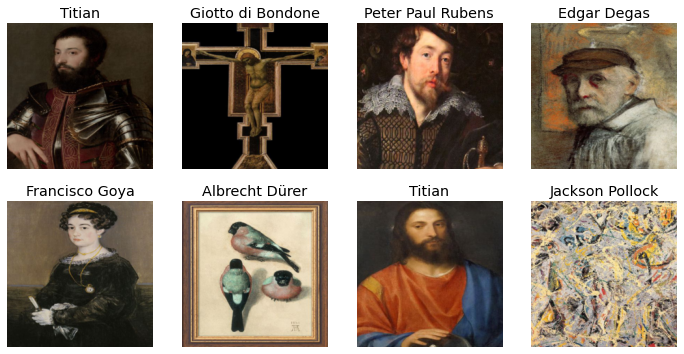

In [9]:
dls = artist.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [10]:
model = cnn_learner(dls, resnet50, metrics=error_rate)
model.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.904068,1.627977,0.423672,02:22


epoch,train_loss,valid_loss,error_rate,time
0,1.545054,1.151923,0.298588,03:03
1,1.125317,0.971306,0.252858,03:03
2,0.636391,0.803188,0.193679,03:04
3,0.359279,0.772945,0.181574,03:04


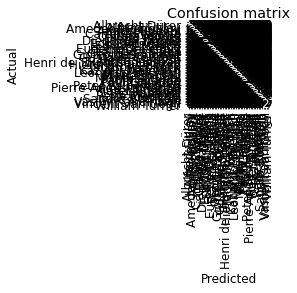

In [11]:
interpreter = ClassificationInterpretation.from_learner(model)
interpreter.plot_confusion_matrix()

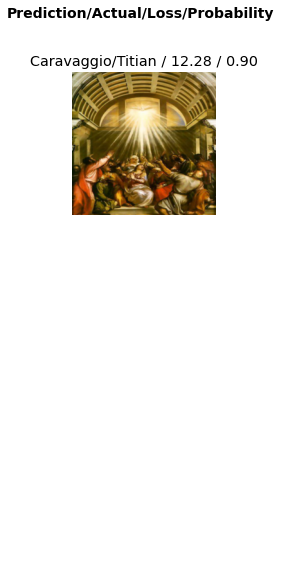

In [12]:
interpreter.plot_top_losses(1, nrows=3)

In [13]:
cleaner = ImageClassifierCleaner(model)
cleaner

In [17]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    
# for moce to different category
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [15]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [18]:
img = PILImage.create(btn_upload.data[-1])

In [19]:
pred,pred_idx,probs = model.predict(img)

In [20]:
lbl_pred = widgets.Label() 
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}' 
lbl_pred

Label(value='Prediction: Jan van Eyck; Probability: 0.7262')

Label(value='Prediction: Jan van Eyck; Probability: 0.7262')